# Analysis of sequential DNA-MERFISH for CTP07

by Pu Zheng

2022.05.30

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_7\20220528-CTP07chr2_hSTG


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

14660


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_7\20220530-CTP07chr2_hSTG_from0308_250gene',
             'save_folder':r'D:\Pu_Temp\20220530-CTP08chr2_hSTG_from0525',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [3]:
folders, fovs = ia.io_tools.data.get_folders(fov_param['data_folder'])

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 88


In [4]:
_overwrite = False
_save_images = True
_fit_spots = True
_warp_images = False

for _fov_id, _fov_name in enumerate(fovs):
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    break
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                #_sel_ids=sel_rids,
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_images, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process DAPI image
    dapi_im = fov._load_dapi_image()
    # 4. Process chrom
    chrom_im = fov._load_chromosome_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 88
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\20220530-CTP07chr2_hSTG_from0308_250gene\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1U2', 'H2U3', 'H3U4', 'H4U5', 'H5U6', 'H6U7', 'H7U8', 'H8U9', 'H9U10', 'H10U11', 'H11U12', 'H12U13', 'H13U14', 'H14U15_rep'])
- 15 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20220530-CTP08chr2_hSTG_from0525\Conv_zscan_00.hdf5
++ base attributes loaded:['chrom_im', 'dapi_im', 'unique_ref_im'] in 3.812s.
+ loading correction from file: D:\Pu_Temp\20220530-CTP08chr2_hSTG_from0525\Conv_zscan_00.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile dir

In [16]:
fov._load_dapi_image(_overwrite=True)

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_7\20220530-CTP07chr2_hSTG_from0308_250gene\H0U1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_7\20220530-CTP07chr2_hSTG_from0308_250gene\H0U1\Conv_zscan_87.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_7\20220530-CTP07chr2_hSTG_from0308_250gene\H0U1\Conv_zscan_87.dax  in 10.453s
-- removing hot pixels for channels:['405'] in 4.689s
-- illumination correction for channels: 405, in 1.499s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 17.140s
-- saving fov_info to file: D:\Pu_Temp\20220530-CTP08chr2_hSTG_from0525\Conv_zscan_87.hdf5
++ base attributes saved:['dapi_im'] in 6.368s.


array([[[503, 720, 533, ..., 716, 680, 627],
        [479, 520, 501, ..., 696, 680, 721],
        [590, 533, 539, ..., 696, 591, 643],
        ...,
        [320, 250, 262, ..., 258, 287, 282],
        [292, 303, 250, ..., 284, 265, 256],
        [262, 288, 314, ..., 271, 287, 271]],

       [[544, 585, 609, ..., 616, 710, 580],
        [560, 555, 528, ..., 685, 685, 705],
        [544, 506, 593, ..., 641, 557, 563],
        ...,
        [260, 265, 279, ..., 253, 258, 242],
        [262, 286, 309, ..., 271, 242, 240],
        [292, 280, 260, ..., 269, 242, 269]],

       [[498, 555, 536, ..., 624, 594, 583],
        [544, 495, 552, ..., 582, 627, 688],
        [522, 571, 528, ..., 663, 549, 635],
        ...,
        [282, 279, 262, ..., 249, 247, 258],
        [286, 286, 260, ..., 269, 249, 242],
        [286, 282, 269, ..., 251, 267, 265]],

       ...,

       [[341, 425, 501, ..., 624, 760, 635],
        [447, 471, 395, ..., 677, 619, 619],
        [463, 441, 495, ..., 602, 668, 691

<IPython.core.display.Javascript object>


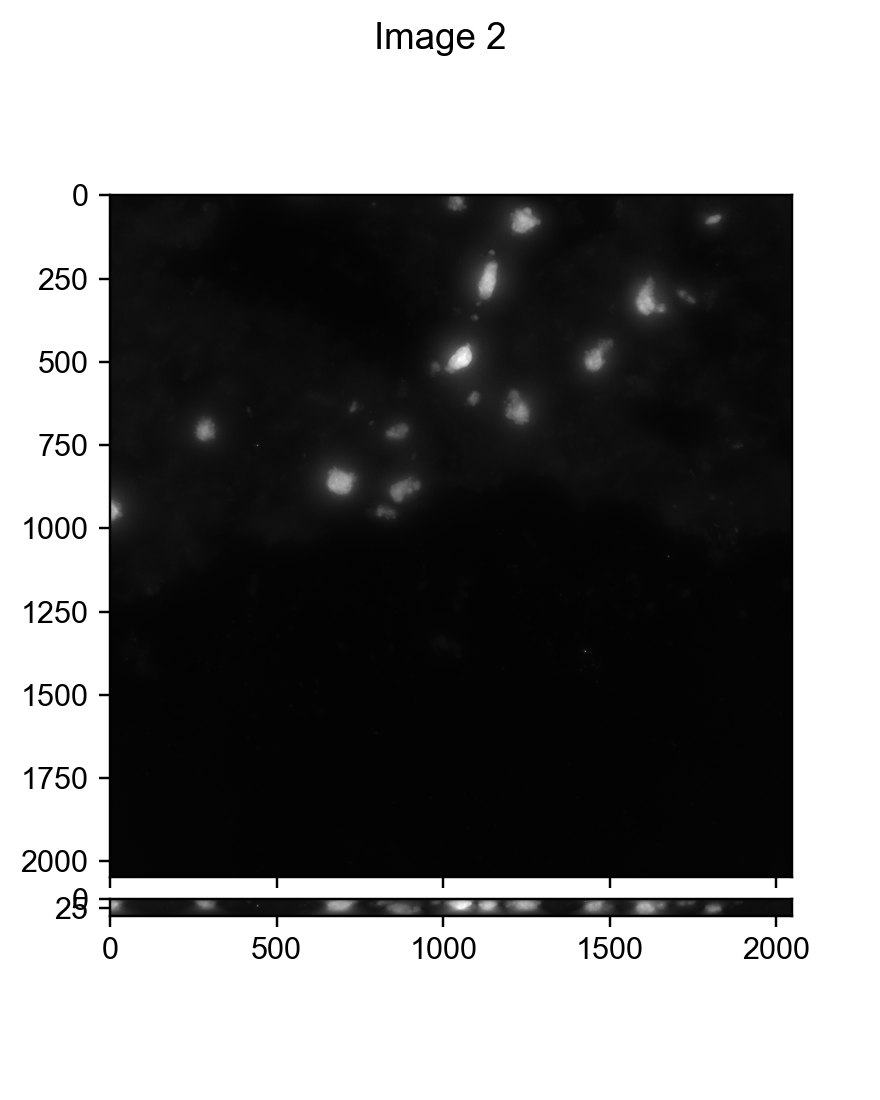

In [17]:
visual_tools.imshow_mark_3d_v2([fov.chrom_im, fov.dapi_im])

In [5]:
fov._load_from_file('unique')

+ loading unique from file: D:\Pu_Temp\20220530-CTP08chr2_hSTG_from0525\Conv_zscan_00.hdf5
++ finish loading unique in 0.090s. 


In [6]:
# load images
with h5py.File(fov.save_filename, 'r') as _f:
    unique_ims = _f['unique/ims'][:]
    

<IPython.core.display.Javascript object>


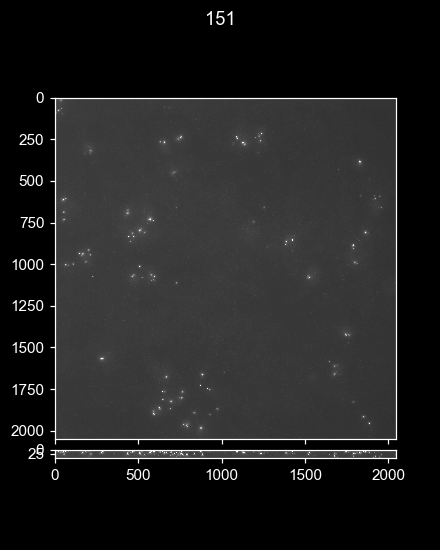

In [15]:
plt.style.use('dark_background')
visual_tools.imshow_mark_3d_v2(unique_ims, min_max_default=[1000,15000], image_names=fov.unique_ids)